# Lending Club Case Study
* Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 



## Problem Statement
* We have to identify the risky loan applicants, and avoid approving loans to defaulters and   reduce financial loss for the company there by cutting down the amount of credit loss.
* company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. 
* The company can utilise this knowledge for its portfolio and risk assessment. 

* By: Apurva Dixit & Sourabh Pujari

#### Lets import the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)

#### Read the dataset

In [3]:
#Import/Read the data
loan_df = pd.read_csv("loan.csv")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#lets find number of rows and columns 
loan_df.shape

(39717, 111)

#### Now let us find the number of null entries in each column

In [5]:
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### Removing the null columns from the data frame

In [6]:
loan_df = loan_df.dropna(axis=1,how='all')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Checking the data types of the columns

In [7]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

#### Checking for the null values percentage wise

In [8]:
nullValuesPerColumn =(loan_df.isnull().sum(axis=0)/len(loan_df))*100
nullValuesPerColumn

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

####  Dropping out below single valued columns as they might not add any value to our analysis
* pymnt_plan :Indicates if a payment plan has been put in place for the loan
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* collections_12_mths_ex_med : Number of collections in 12 months excluding medical collections
* policy_code : publicly available policy_code=1 / new products not publicly available policy_code=2
* acc_now_delinq : The number of accounts on which the borrower is now delinquent.
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* tax_liens: Number of tax liens
* delinq_amnt : The past-due amount owed for the accounts on which the borrower is now delinquent.


In [10]:
loan_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_df.shape

(39717, 49)

#### Dropping out columns which are not required for analysis
* removing desc as it contains description
* Useless Columns :-  "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". 
* out_prncp_inv :- Remaining outstanding principal for portion of total amount funded by investors
* total_pymnt_inv :- Payments received to date for portion of total amount funded by investors

    

In [11]:
loan_df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d","desc","out_prncp_inv","total_pymnt_inv", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
loan_df.shape

(39717, 24)

In [12]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [13]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

#### Loan status = 'Current' cannot be labelled as 'default' as borrower is in loan process

In [14]:
loan_df['loan_status'].value_counts()
loan_df = loan_df[~(loan_df['loan_status'] == 'Current')]
loan_df.shape

(38577, 24)

## Data Cleaning

In [15]:
loan_df.isnull().sum()[loan_df.isnull().sum() != 0]

emp_length              1033
revol_util                50
pub_rec_bankruptcies     697
dtype: int64

#### Treating employment length missing values

In [16]:
print(loan_df['emp_length'].value_counts())
print("MODE = ",loan_df['emp_length'].value_counts()[0])

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64
MODE =  8488


#### Replacing all the null vallues with the Mode Values.

In [17]:
# Replace null values with mode,as very less number of records are null so this imputation won't affect to our anaylsis

loan_df['emp_length']=loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0])

In [18]:
#Crosschecking the null values in the column

loan_df['emp_length'].isnull().sum()

0

In [19]:
# Checking for the nulll values

loan_df.isnull().sum()[loan_df.isnull().sum() != 0]

revol_util               50
pub_rec_bankruptcies    697
dtype: int64

#### Treating revol_util column missing values

In [20]:
loan_df['revol_util'].describe()

count     38527
unique     1088
top          0%
freq        954
Name: revol_util, dtype: object

#### Standardizing the 'revol_util' column

* for standardizing the revol_util column we will remove the % sign and convert to float type from string

In [21]:
loan_df.revol_util = loan_df.revol_util.str.replace('%','').astype(float)

In [22]:
# Checking 'revol_util' column again

loan_df['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [23]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state         

#### Replace null values with mean,as we can see mean and median difference is very negligible which means data is evenly distributed

In [24]:
loan_df['revol_util']=loan_df['revol_util'].fillna(loan_df['revol_util'].median())

#### Standardizing columns: emp_length,int_rate,issue_d

In [25]:
loan_df['emp_length']=loan_df.emp_length.apply(lambda x:'10' if x =='10+ years' else ('0' if x=='< 1 year' else x.replace('years','').replace('year','').strip())).astype(int)

loan_df.int_rate = loan_df.int_rate.str.replace('%','').astype(float)

loan_df.issue_d = pd.to_datetime(loan_df.issue_d,format='%b-%y')

In [26]:
loan_df[['emp_length','int_rate','issue_d']].head()

,emp_length,int_rate,issue_d
0,10,10.65,2011-12-01
1,0,15.27,2011-12-01
2,10,15.96,2011-12-01
3,10,13.49,2011-12-01
5,3,7.90,2011-12-01


In [27]:
loan_df[['emp_length','int_rate','issue_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   emp_length  38577 non-null  int32         
 1   int_rate    38577 non-null  float64       
 2   issue_d     38577 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 1.0 MB


#### Drop Duplicate Rows

In [28]:
print ("Before dropping duplicate rows: ", loan_df.shape)
loan_df.drop_duplicates()
print ("After dropping duplicate rows: ", loan_df.shape)

Before dropping duplicate rows:  (38577, 24)
After dropping duplicate rows:  (38577, 24)


* No duplicate rows found

## Univariate Analysis

#### Data distribution for few important columns

In [29]:
#segregating numerical and categorical columns 

numerical_cols = ['loan_amnt','int_rate','installment','emp_length','annual_inc','dti','revol_util']

categorical_cols = ['term','grade','home_ownership','verification_status','loan_status','purpose','pub_rec_bankruptcies']

- ***Presenting all numerical columns using boxplot to check outliers***

----------loan_amnt----------


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


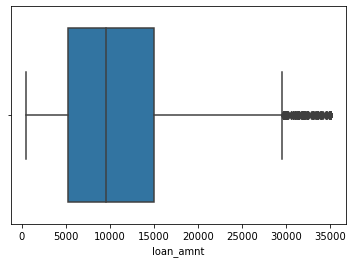

----------int_rate----------


count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64


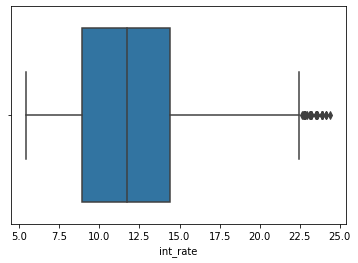

----------installment----------


count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64


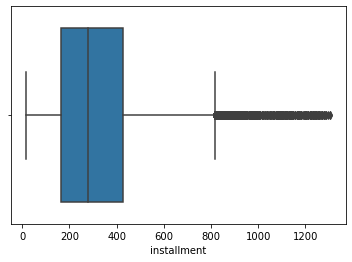

----------emp_length----------


count    38577.000000
mean         5.076445
std          3.602917
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


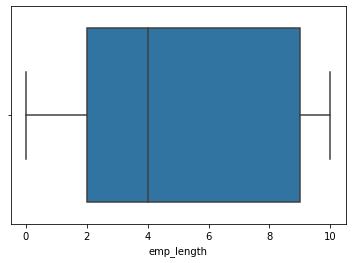

----------annual_inc----------


count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


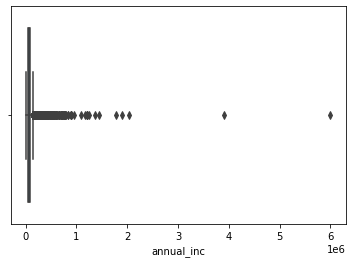

----------dti----------


count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


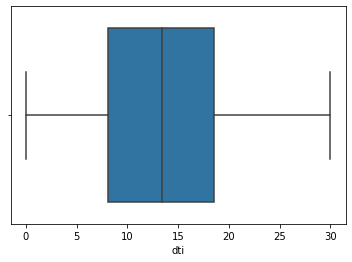

----------revol_util----------


count    38577.000000
mean        48.703292
std         28.346356
min          0.000000
25%         25.200000
50%         49.100000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64


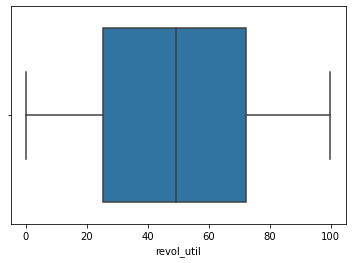

In [30]:
for i in numerical_cols:
    print('----------'+i+'----------')
    sns.boxplot(loan_df[i])
    print('\n')
    print(loan_df[i].describe())
    plt.show()

#### From above findings we can conclude that column annual_inc have few outliers and no other columns have an outlier

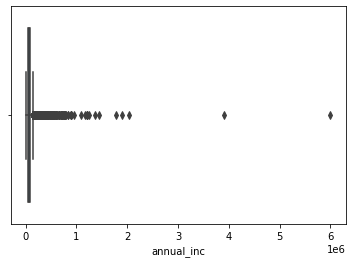

In [31]:
sns.boxplot(loan_df.annual_inc)
loan_df.annual_inc.describe()
plt.show()

In [32]:
loan_df_quant = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1])
loan_df_quant

0.50      58868.0
0.75      82000.0
0.90     115000.0
0.95     140004.0
0.97     165000.0
0.98     187000.0
0.99     234144.0
1.00    6000000.0
Name: annual_inc, dtype: float64

* Outliers above 95 percentile removed

<AxesSubplot:xlabel='annual_inc'>

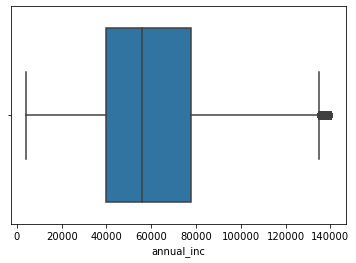

In [33]:
quant_95 = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df['annual_inc'] <= quant_95]
sns.boxplot(loan_df['annual_inc'])

#### Loan Status Vs Loan Counts

Fully Paid     31236
Charged Off     5418
Name: loan_status, dtype: int64


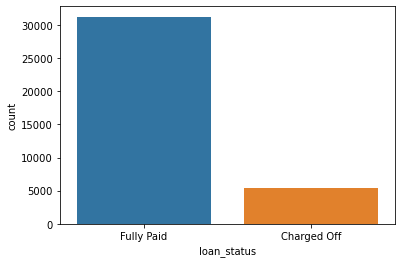

In [34]:
print(loan_df["loan_status"].value_counts())
sns.countplot(loan_df["loan_status"])
plt.show()

##### Conclusion : Majority of loans are Fully paid and charged off loans are about 14.3% of the total loans

#### Term Plot

 36 months    27721
 60 months     8933
Name: term, dtype: int64


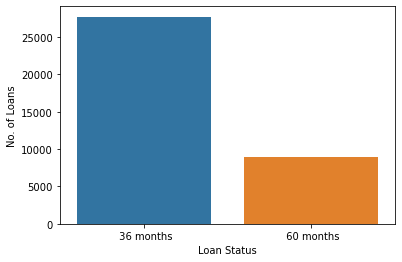

In [35]:
print(loan_df["term"].value_counts())
sns.countplot(loan_df["term"]).set(xlabel='Loan Status', ylabel='No. of Loans')

plt.show()

##### Conclusion : Number of loans borrowed for the term of 36 months is more as compared to the Number of loans borrowed for the term of 60 months

#### Grade Plot

B    11097
A     9646
C     7481
D     4835
E     2448
F      886
G      261
Name: grade, dtype: int64


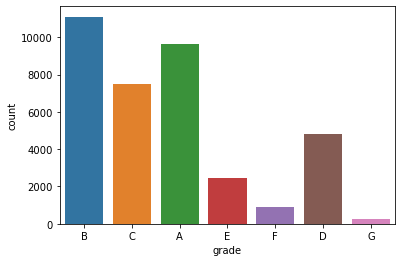

In [36]:
print(loan_df["grade"].value_counts())
sns.countplot(loan_df["grade"])
plt.show()

##### Conclusion : Maximum loans are taken by A, B an C grade applicants

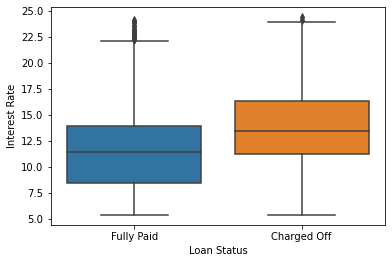

In [37]:
sns.boxplot(y='int_rate', x='loan_status', data=loan_df)
plt.ylabel('Interest Rate')
plt.xlabel('Loan Status')
plt.show()

#### Home_ownership plot

RENT        18031
MORTGAGE    15675
OWN          2852
OTHER          93
NONE            3
Name: home_ownership, dtype: int64


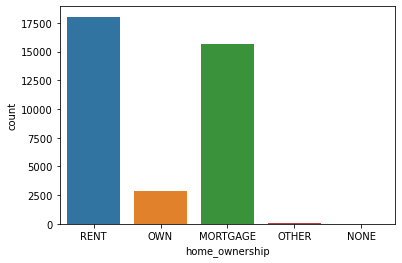

In [38]:
print(loan_df["home_ownership"].value_counts())
sns.countplot(loan_df["home_ownership"])
plt.show()

##### Conclusion : Majority of the loan applicants are living in Rented  and 2nd most largest number of applicants with Mortgaged homes

#### Verification status Plot

Not Verified       16280
Verified           11219
Source Verified     9155
Name: verification_status, dtype: int64


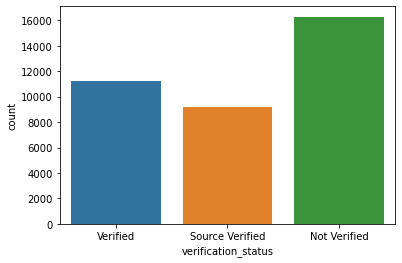

In [39]:
print(loan_df["verification_status"].value_counts())
sns.countplot(loan_df["verification_status"])
plt.show()

##### Conclusion : Maximum Number of loans are not Verified

#### Count plot based on the purpose 

debt_consolidation    17305
credit_card            4783
other                  3699
home_improvement       2556
major_purchase         2046
small_business         1623
car                    1448
wedding                 893
medical                 641
moving                  550
vacation                365
house                   338
educational             312
renewable_energy         95
Name: purpose, dtype: int64


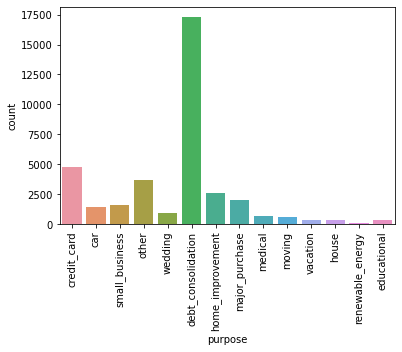

In [40]:
print(loan_df["purpose"].value_counts())
sns.countplot(loan_df["purpose"])
plt.xticks(rotation=90)
plt.show()

##### Conclusion : Majority of loans are taken for the debt consolidation purpose

10    8902
0     4327
2     4101
3     3824
4     3200
5     3044
1     3043
6     2073
7     1644
8     1343
9     1153
Name: emp_length, dtype: int64


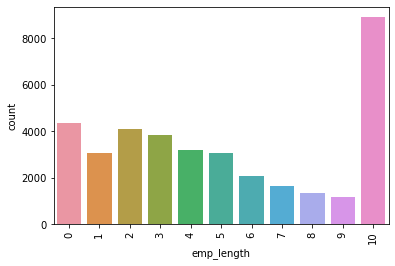

In [41]:
print(loan_df["emp_length"].value_counts())
sns.countplot(loan_df["emp_length"])
plt.xticks(rotation=90)
plt.show()

##### Conclusion : Applicants who have 10 and more years of experience are applying more for the loan and less than 1 years stand at the 2nd position.

#### Funded amount

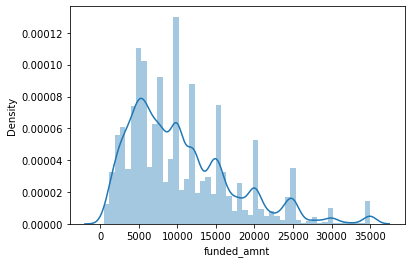

In [42]:
sns.distplot(loan_df['funded_amnt'])
plt.show()

#### Amount funded by the investors

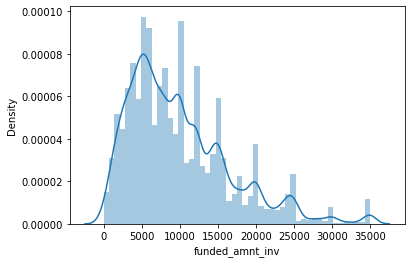

In [43]:
sns.distplot(loan_df['funded_amnt_inv'])
plt.show()

##### Conclusion : Majority of Amount funded by invertors is 5000

### Grouping of numerical variable
#### Time of Employment into groups

In [44]:
bins_range = [-1,0,5,9,10]
bin_labels = ['less than 1 yr','1-5 yrs','5-10yrs','10+ yrs']
pd.cut(loan_df['emp_length'], bins=bins_range)
loan_df['employment_range'] = pd.cut(loan_df['emp_length'], bins=bins_range, labels=bin_labels)

#### Groups of Borrower's annual income

In [45]:
loan_df.annual_inc.describe()

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

In [46]:
bins_range = list(np.arange(0,150000,30000))
bin_labels = ['0-30k','30-60k','60-90k','90-120k']
loan_df['annual_inc_range']=pd.cut(loan_df['annual_inc'], bins=bins_range,labels=bin_labels)

#### Groups of Interest rate

In [47]:
loan_df.int_rate.describe()

count    36654.000000
mean        11.888080
std          3.667257
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [48]:
bins_range = [0,5,10,15,20,25]
bin_labels = ['0-5%','5-10%','10-15%','15-20%','20-25%']
loan_df['int_rate_range']=pd.cut(loan_df['int_rate'], bins=bins_range, labels=bin_labels)

#### Groups of DTI

In [49]:
loan_df.dti.describe()

count    36654.000000
mean        13.446725
std          6.661899
min          0.000000
25%          8.350000
50%         13.580000
75%         18.710000
max         29.990000
Name: dti, dtype: float64

In [50]:
bins_range = [0,5,10,15,20,25,30]
bin_labels = ['0-5','5-10','10-15','15-20','20-25','25-30']
loan_df['dti_range']=pd.cut(loan_df['dti'], bins=bins_range, labels=bin_labels)

In [51]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,employment_range,annual_inc_range,int_rate_range,dti_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.7,9,0.0,10+ yrs,0-30k,10-15%,25-30
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.4,4,0.0,less than 1 yr,0-30k,15-20%,0-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.5,10,0.0,10+ yrs,0-30k,15-20%,5-10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21.0,37,0.0,10+ yrs,30-60k,10-15%,15-20
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,0,28.3,12,0.0,1-5 yrs,30-60k,5-10%,10-15


## Univariate Segmented Analysis

- ***Let's check interest rate vs purpose,grade***

* Interest rate is high for high loan amount.

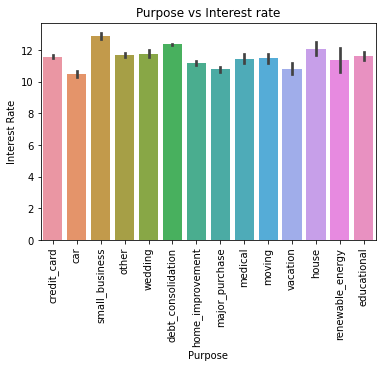

In [52]:
sns.barplot(data=loan_df,x='purpose',y='int_rate')
plt.xticks(rotation=90)
plt.title('Purpose vs Interest rate',fontsize=12)
plt.xlabel("Purpose")
plt.ylabel("Interest Rate")
plt.show()

##### Conclusion : Interest rate is on an average above 10% for all purposes of loans.

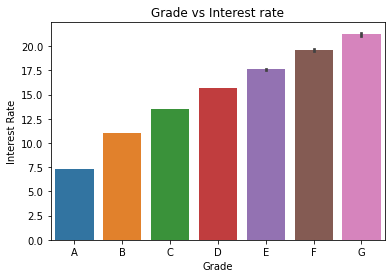

In [53]:
sns.barplot(data=loan_df,x='grade',y='int_rate',order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Grade vs Interest rate',fontsize=12)
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

##### Conclusion : Interest rate is high for lower grades

## Bivariate Analysis¶

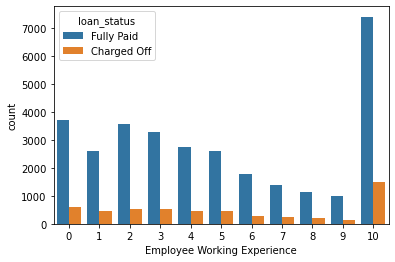

In [54]:
sns.countplot(x='emp_length', hue='loan_status', data=loan_df)
plt.xlabel('Employee Working Experience')
plt.show()

* People Who have 10 years of employment length have higher chances of defaulting.

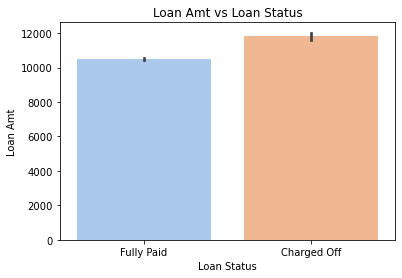

In [55]:
sns.barplot(y='loan_amnt', x='loan_status', data=loan_df,palette='pastel')
plt.title('Loan Amt vs Loan Status',fontsize=12)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amt")
plt.show()

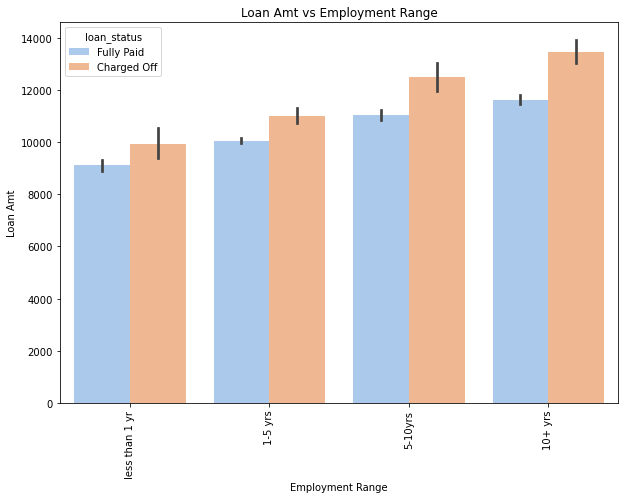

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(data=loan_df,x='employment_range',y='loan_amnt',hue='loan_status',palette='pastel')
plt.xticks(rotation=90)
plt.title('Loan Amt vs Employment Range',fontsize=12)
plt.xlabel("Employment Range")
plt.ylabel("Loan Amt")
plt.show()

##### Conclusion : High loan amount i.e above 12K and 10+ years of experience are majorily charged off.

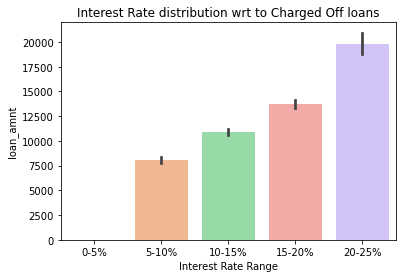

In [57]:
sns.barplot(data=loan_df[loan_df['loan_status']=='Charged Off'],x='int_rate_range',y='loan_amnt',palette='pastel')
plt.title('Interest Rate distribution wrt to Charged Off loans',fontsize=12)
plt.xlabel("Interest Rate Range")
plt.show()

##### Conclusion : Interest Rate within 10-15% are majorily charged off. 

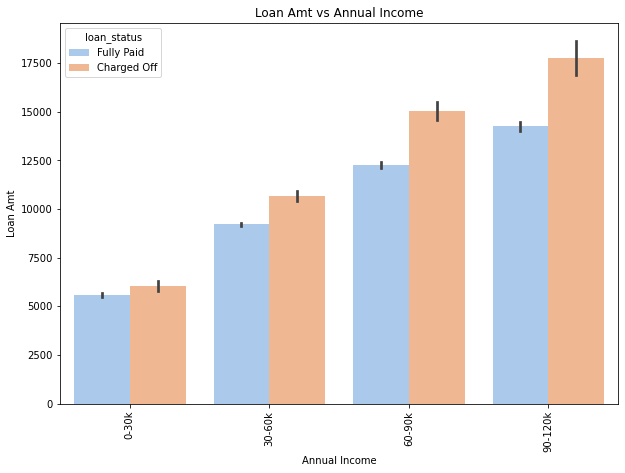

In [58]:
plt.figure(figsize=(10,7))
sns.barplot(data=loan_df,x='annual_inc_range',y='loan_amnt',hue='loan_status',palette='pastel')
plt.xticks(rotation=90)
plt.title('Loan Amt vs Annual Income',fontsize=12)
plt.xlabel("Annual Income")
plt.ylabel("Loan Amt")
plt.show()

##### Conclusion : High Annual Income and loan amount above 15K are majorily Charged off.

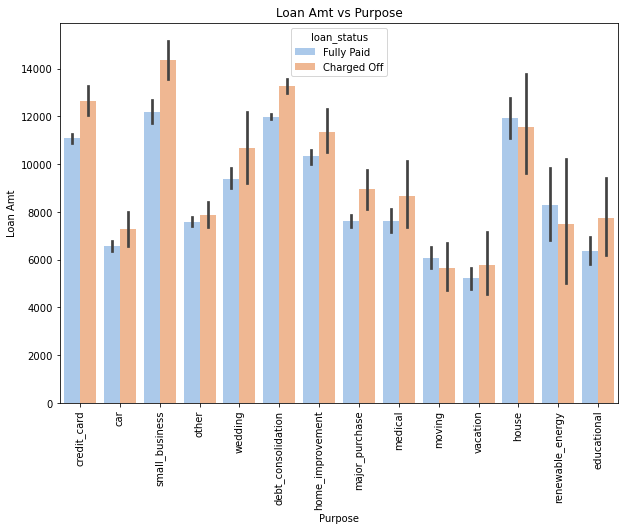

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(data=loan_df,x='purpose',y='loan_amnt',hue='loan_status',palette='pastel')
plt.xticks(rotation=90)
plt.title('Loan Amt vs Purpose',fontsize=12)
plt.xlabel("Purpose")
plt.ylabel("Loan Amt")
plt.show()

##### Conclusion : Loan applications for Small Businesses and amount greater than 12K are majorily Charged off.

#### Loan amount Vs Term

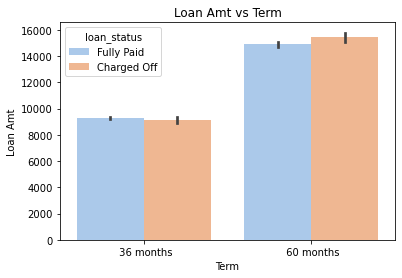

In [60]:
sns.barplot(data=loan_df,x='term',y='loan_amnt',hue='loan_status',palette='pastel')
plt.title('Loan Amt vs Term',fontsize=12)
plt.xlabel("Term")
plt.ylabel("Loan Amt")
plt.show()

##### Conclusion : We can say that applicants applying for long term has high loan amount.

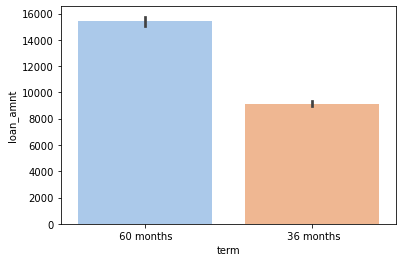

In [61]:
sns.barplot(data=loan_df[loan_df['loan_status']=='Charged Off'],x='term',y='loan_amnt',palette='pastel')
plt.show()

##### Conclusion : Loans applied for 60 months term.

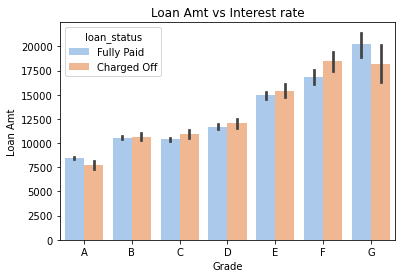

In [62]:
sns.barplot(data=loan_df,x='grade',y='loan_amnt',order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'],hue='loan_status',palette='pastel')
plt.title('Loan Amt vs Interest rate',fontsize=12)
plt.xlabel("Grade")
plt.ylabel("Loan Amt")
plt.show()

##### Conclusion : High grade has high charged off tendency.

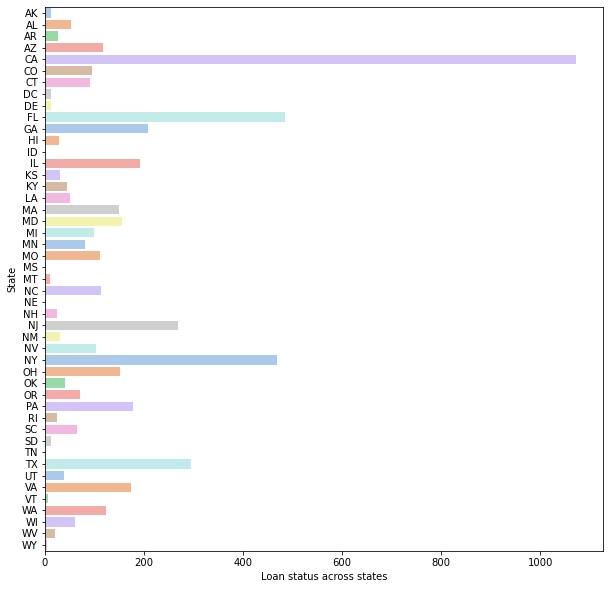

In [63]:
df_state = loan_df[loan_df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=df_state,palette='pastel')
plt.xlabel('Loan status across states')
plt.ylabel('State')
plt.show()

##### Conclusion : State CA has high charged off loans.

## Observations :

Summary for the provided dataset:	
- Charged off loans are about 14.3% of the total loans.
- Majority of the loans are high graded loans.
- Majority of the loan applicants are living either in Rented or Mortgaged homes.
- Majority of loans are not varified
- Maximun loans are given for debt consolidation.
- Majority of Amount funded by invertors is 5000
- Interest rate is on an average above 10% for all purposes of loans.
- Interest rate is high for lower grades

Possible Driving Factors for loan default:

- 10+ years of employment experience.
- High Interest Rate
- Loans applied for 60 months term.
- High Annual Income and loan amount above 15K
- Loan applications for Small Businesses and amount greater than 12K
- High graded loans
- Loan applied for above 15K